<a href="https://colab.research.google.com/github/vrotich-github/vrotich-github/blob/main/CAPSTONE_PROJECTMDV2020_refineddd_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Mounting google drive and creating a path where I will store the libraries that will be used for this project.

In [ ]:

import os, sys  #To interact with Google Drive's operating system
from google.colab import drive   #The drive module provides us with the capability to utilize Python for interacting with Google Drive.

drive.mount('/content/gdrive')#mounting google drive enables us to work with the drives contents

nb_path = '/content/notebooks'
os.symlink('/content/gdrive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)  # or append(nb_path)
#The last three lines are what changes the path of the file.


Mounted at /content/gdrive


In [ ]:
sudo pip install -v --install-option="--no" --install-option="DLIB_USE_CUDA" dlib



importing the libraries and permanently stored in colab. I used the **!pip install --target=$nb_path** libraries: to import and permanentlystore these libraries to colab for easy running the notebook: libraries itslaeed for this project include; CMake, dlib:e, face recognition, opencv-python, pytesseract, zstandard, pyzstd, mtcnn, spacy

In [ ]:

import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')


In [ ]:
#pip install face_recognition
#pip install pytesseract
import os
from os import listdir
import numpy as np # numerical operations
import random
from tqdm import tqdm
import pandas as pd
import pyzstd
import io
import zipfile
import tarfile
from matplotlib import pyplot as plt
from matplotlib.image import imread
import matplotlib.image as mpimg

from PIL import Image
import pytesseract
import dlib
import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
import face_recognition #for face recognition tasks.
import cv2 #OpenCV library for computer vision tasks.
import face_recognition
import joblib  #Library for reading and writing binary files, used here to load the pre-trained face recognition model.
from google.colab.patches import cv2_imshow  # Import the Colab-specific function
from PIL import Image        # Imaging Library for image-related tasks.

import spacy


OSError: [Errno 107] Transport endpoint is not connected: '/content/notebooks'

In [ ]:
!ls gdrive/MyDrive        #chekinf the contents on my drives


'Capstone project'  'Colab Notebooks'  'group capstone project datafile'   kaggle


In [ ]:
# Path to the identification document
real_dir = "/content/gdrive/MyDrive/Capstone project/MIDV2020/real identification document"
generated_photos_dir="/content/gdrive/MyDrive/Capstone project/generated_photos"

In [ ]:
# List classes in the "images" directory
images_contents = os.listdir(real_dir)

print("Classes and directories in 'images' directory:")
print(images_contents)


Classes and directories in 'images' directory:
['esp_id', 'aze_passport', 'grc_passport', 'lva_passport', 'svk_id', 'rus_internalpassport', 'est_id', 'srb_passport', 'alb_id', 'fin_id']


In [ ]:
# List of class names
class_names = ['alb_id', 'aze_passport', 'esp_id', 'est_id', 'fin_id', 'grc_passport', 'lva_passport', 'rus_internalpassport', 'srb_passport', 'svk_id']


In [ ]:
#Data structure

#Code --- Description
#alb_id ---- ID Card of Albania
#aze_passport--- Passport of Azerbaijan
#esp_id --- ID Card of Spain
#est_id --- ID Card of Estonia
#fin_id --- ID Card of Finland
#rus_internalpassport--- Internal passport of Russia
#srb_passport --- Passport of Serbia
#svk_id --- ID Card of Slovakia

Data Sample of the Identifiation document

In [ ]:
# Count the number of images in each class
class_counts = [len(os.listdir(os.path.join(real_dir, class_name))) for class_name in class_names]

# Print the number of classes and their counts
print("Number of classes:", len(class_names))
for class_name, count in zip(class_names, class_counts):
    print(f"{class_name}: {count} images")

Number of classes: 10
alb_id: 100 images
aze_passport: 100 images
esp_id: 100 images
est_id: 100 images
fin_id: 100 images
grc_passport: 100 images
lva_passport: 100 images
rus_internalpassport: 100 images
srb_passport: 100 images
svk_id: 100 images


DATA VISUALIZATION

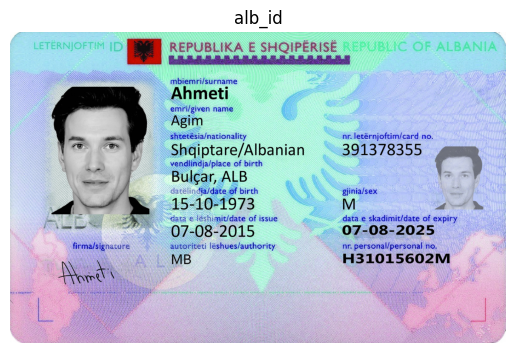

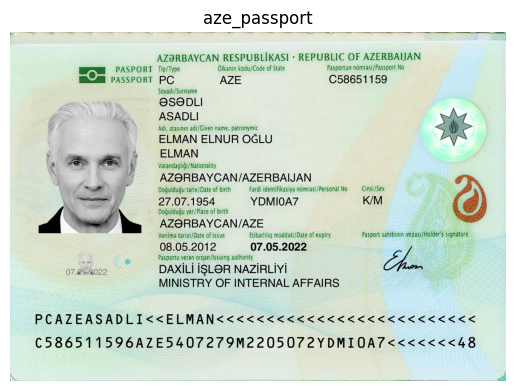

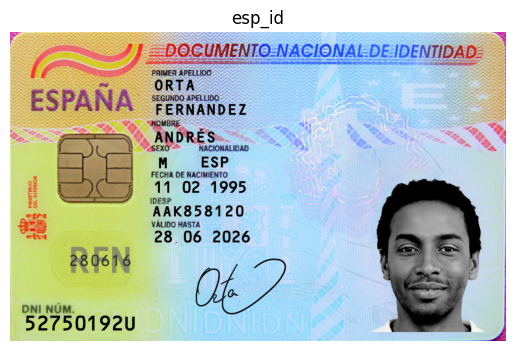

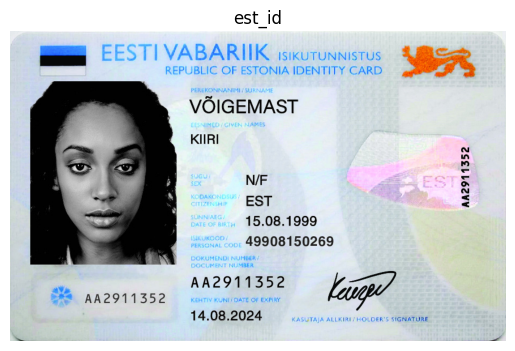

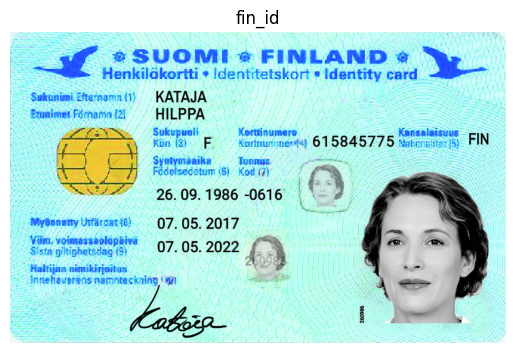

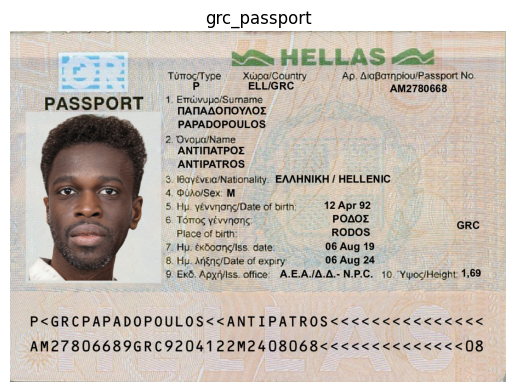

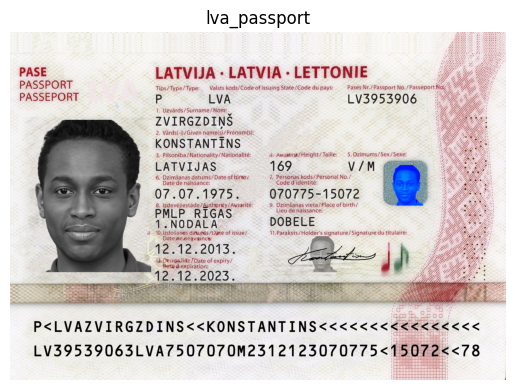

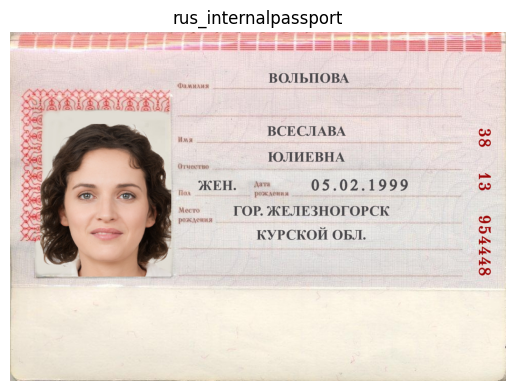

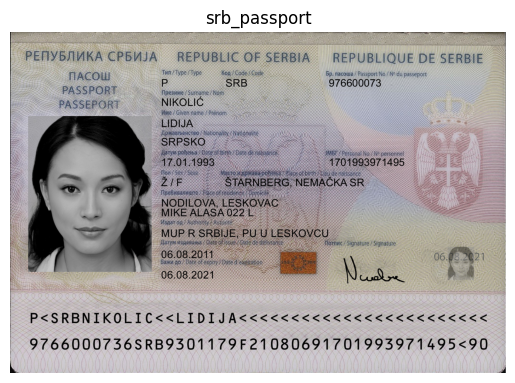

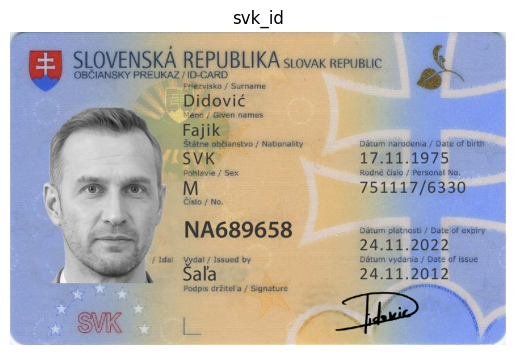

In [ ]:
# Function to load and display one image from each class
def display_sample_images(real_dir, class_names):
    for class_name in class_names:
        class_dir = os.path.join(real_dir, class_name)

        # Get a random image from the class directory
        image_file = random.choice(os.listdir(class_dir))
        image_path = os.path.join(class_dir, image_file)

        # Load and display the image
        img = imread(image_path)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
        plt.show()

display_sample_images(real_dir, class_names)

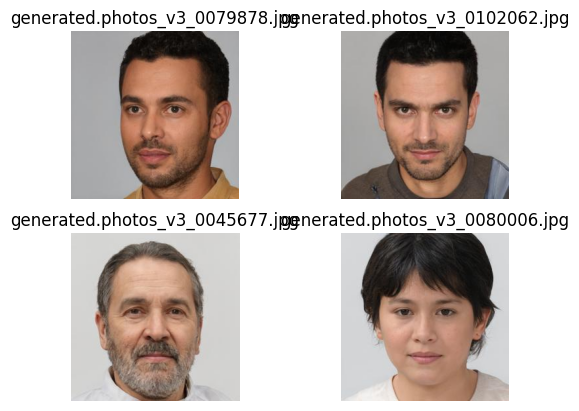

In [ ]:
def display_random_images_from_directory(num_images=4):
    # Get a list of files in the directory
    image_files = [f for f in os.listdir(generated_photos_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

    # Choose any 4 random images
    random_images = random.sample(image_files, min(num_images, len(image_files)))

    # Display the random images
    for i, img_file in enumerate(random_images):
        img_path = os.path.join(generated_photos_dir, img_file)
        img = mpimg.imread(img_path)

        plt.subplot(2, 2, i + 1)
        plt.imshow(img)
        plt.title(img_file)
        plt.axis('off')

    plt.show()

display_random_images_from_directory(num_images=4)


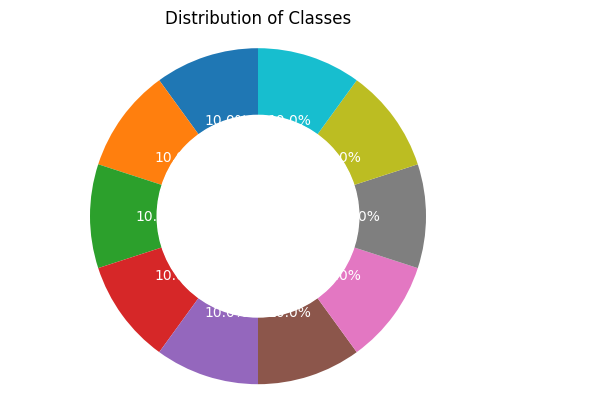

In [ ]:
# Plot a donut pie chart
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), textprops=dict(color="w"))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a circle at the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.6, color='white')
ax.add_artist(center_circle)

plt.title('Distribution of Classes')
plt.show()

# Face Recognition Model (train on real ID document photos)


The process involved in this task includes iterating over the directories of classes, followed by iterating over the images within each class directory. Each image is loaded and the face encodings are extracted using the face_encodings() function from the face_recognition library. These extracted face encodings are then added to the face_encodings list.

# **code that worked**

In [ ]:
# using the photos as the training dataset and real identification document as the test dataset
train_images_directory= os.path.join(generated_photos_dir)
test_images_directory= os.path.join(real_dir)


# Image preprocessing

The function accepts an input image, img, and proceeds to normalize the pixel values within the range of 0 to 1. Additionally, it applies histogram equalization to enhance the contrast of the image. Finally, the function outputs the preprocessed image as the result.                                      Resize_image function is designed to resize the input image, img, to the desired target size specified by target_size. By default, the target size is set to (128,128). Upon execution, the function will return the resized image.

Train the generated photos using the face recognistion model

The function train_face_recognition_model is responsible for training the face recognition model using a collection of known face images. It proceeds by loading each image, applying preprocessing and resizing techniques, and extracting the face encoding with the assistance of the face_recognition library. Ultimately, the function provides the known face encodings and corresponding names as its output.

In [ ]:

def train_face_recognition_model(train_images_directory):
    known_face_encodings = []
    known_face_names = []

    for filename in os.listdir(train_images_directory):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(train_images_directory, filename)
            img = face_recognition.load_image_file(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Find face location
            face_location = face_recognition.face_locations(img)
            if len(face_location) > 0:
                # Encode the face
                face_encoding = face_recognition.face_encodings(img, face_location)[0]

                # Extract the name from the filename
                name = filename

                # Append the encoding and name to the lists
                known_face_encodings.append(face_encoding)
                known_face_names.append(name)

    return known_face_encodings, known_face_names

The recognize_faces function: here the test image undergoes face recognition in this function by utilizing the face encodings and names acquired from the train_face_recognition_model function. Preprocessing and resizing techniques are applied to the test image, followed by the detection of face locations and encodings. These encodings are then compared with the known face encodings. If the distance between a test face encoding and a known face encoding falls below the specified threshold, the face is assigned the recognized name. Otherwise, the face is labeled as "Unknown". Ultimately, the function provides a list containing the recognized individuals, their corresponding face locations, and the assigned names.

In [ ]:

def recognize_faces(test_image, known_face_encodings, known_face_names):
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(test_image)
    face_encodings = face_recognition.face_encodings(test_image, face_locations)

    recognized_people = []

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # Compare the test encoding with known encodings
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)

        # Find the index with the smallest distance (most likely match)
        min_distance_index = np.argmin(face_distances)

        # Check if the minimum distance is below a certain threshold (you may need to adjust this)
        threshold = 0.6
        if face_distances[min_distance_index] < threshold:
            recognized_name = known_face_names[min_distance_index]
        else:
            recognized_name = "Unknown"

        recognized_people.append((top, right, bottom, left, recognized_name))

    return recognized_people

Train the face recognition model using the known face images in the training directory.

In [ ]:
# Train the face recognition model
known_face_encodings, known_face_names = train_face_recognition_model(train_images_directory)

In [ ]:
#saving the trained model
import joblib


# Save the trained model to a file
face_recog_model = 'face_recognition_model.joblib'
joblib.dump((known_face_encodings, known_face_names), 'face_recog_model')

# Now you can use 'model_filename' to load the model in subsequent runs


['face_recog_model']

Test the train model

Test the model


Testing for class: esp_id

Test Image: /content/gdrive/MyDrive/Capstone project/MIDV2020/real identification document/esp_id/10.jpg
Recognized Person: generated.photos_v3_0021119.jpg

Testing for class: aze_passport

Test Image: /content/gdrive/MyDrive/Capstone project/MIDV2020/real identification document/aze_passport/72.jpg
Recognized Person: generated.photos_v3_0029937.jpg

Testing for class: grc_passport

Test Image: /content/gdrive/MyDrive/Capstone project/MIDV2020/real identification document/grc_passport/46.jpg
Recognized Person: generated.photos_v3_0104084.jpg

Testing for class: lva_passport

Test Image: /content/gdrive/MyDrive/Capstone project/MIDV2020/real identification document/lva_passport/91.jpg
Recognized Person: generated.photos_v3_0074826.jpg

Testing for class: svk_id

Test Image: /content/gdrive/MyDrive/Capstone project/MIDV2020/real identification document/svk_id/53.jpg
Recognized Person: generated.photos_v3_0021471.jpg

Testing for class: rus_internalpassport

Te

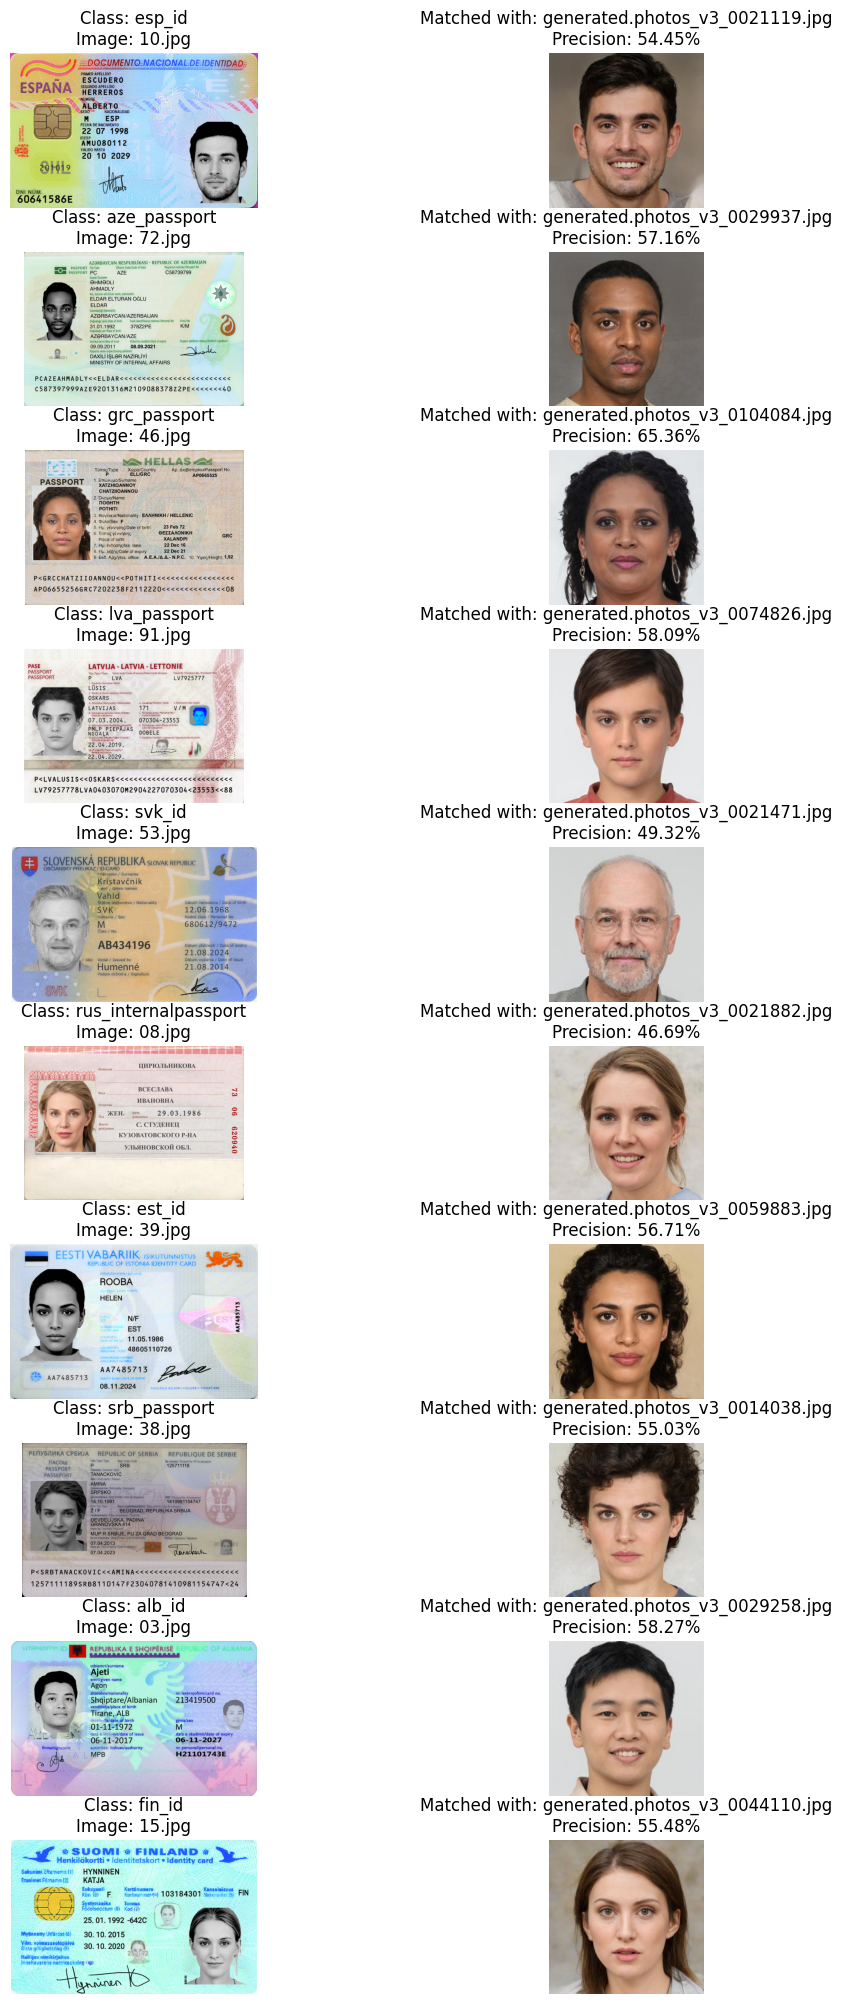

In [ ]:
# Create a figure with subplots for each class
fig, axs = plt.subplots(10, 2, figsize=(10, 20))
fig.tight_layout()

# Iterate through each class in the test images directory
for idx, class_name in enumerate(os.listdir(test_images_directory)):
    class_path = os.path.join(test_images_directory, class_name)

    # Ensure it's a directory
    if os.path.isdir(class_path):
        print(f"\nTesting for class: {class_name}")

        # Select one random image from the class
        images_in_class = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))]
        selected_image = random.choice(images_in_class)

        # Get the path of the selected image
        test_image_path = os.path.join(class_path, selected_image)
        test_image = cv2.imread(test_image_path)

        # Recognize faces in the test image
        recognized_people = recognize_faces(test_image, known_face_encodings, known_face_names)

        # Display the result
        print(f"\nTest Image: {test_image_path}")

        if not recognized_people:       #If there are no recognized people, it prints "No match found" and continues to the next iteration.
            # No match found
            print("No match found.")
            continue

        for (top, right, bottom, left, recognized_person) in recognized_people:
            print(f"Recognized Person: {recognized_person}")

            # Display the test image with face rectangles and recognized names
            axs[idx, 0].imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
            axs[idx, 0].set_title(f"Class: {class_name}\nImage: {selected_image}")
            axs[idx, 0].axis('off')

            # Display the generated photo that matches the recognized person
            generated_photo_path = os.path.join(generated_photos_dir, recognized_person)
            generated_photo = cv2.imread(generated_photo_path)

            # Calculate precision percentage
            face_encoding_test = face_recognition.face_encodings(test_image, [(top, right, bottom, left)])[0]
            face_encoding_generated = face_recognition.face_encodings(generated_photo)[0]
            precision_percentage = (1 - np.linalg.norm(np.array(face_encoding_test) - np.array(face_encoding_generated))) * 100

            # Display the precision percentage in the title
            axs[idx, 1].imshow(cv2.cvtColor(generated_photo, cv2.COLOR_BGR2RGB))
            axs[idx, 1].set_title(f"Matched with: {recognized_person}\nPrecision: {precision_percentage:.2f}%")
            axs[idx, 1].axis('off')

            # Break after processing one image from each class
            break

# Show the plot
plt.show()

# **model deployment**  the trained model is deployed to perform face recognition on new ID document photos. It uses the trained model to extract features from the new faces, and then compare these features to the known identities to recognize individuals.

# **Image Recognition with User Input:**

The output of the script will exhibit the image of the identification document, the selfie image, and the results of the identity verification, which include the matching outcome and the precision percentage. It is worth mentioning that the display of images in the Colab environment is made possible by utilizing cv2_imshow. This demonstration highlights the model's real-time capabilities and its proficiency in handling live photo inputs.

The function enables users to either upload images or choose them from a designated folder. By running the model on the selected image, the recognized faces and corresponding names are displayed. This serves as a demonstration of the model's capability to process user-provided data and showcases its ability to operate in real-time.

Enter the path of the identification document image: /content/gdrive/MyDrive/Capstone project/someladys id.JPG
Enter the path of the selfie image: /content/gdrive/MyDrive/Capstone project/someladys photos.JPG


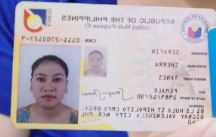

Identification Document Image


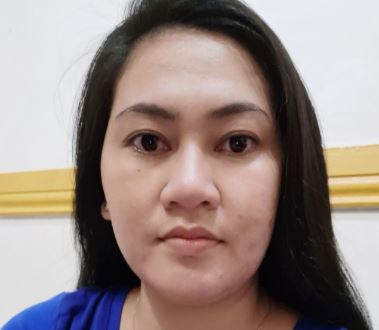

Selfie Image

Identity Verification Result: Match
Precision Percentage: 54.40%


In [ ]:


# Load the trained model
known_face_encodings, known_face_names = joblib.load("face_recog_model")

# Function to perform identity verification
def verify_identity(id_document_path, selfie_path):
    try:
        # Load images
        id_image = face_recognition.load_image_file(id_document_path)
        selfie_image = face_recognition.load_image_file(selfie_path)
    except Image.UnidentifiedImageError:
        print("Error: Unsupported image format or corrupted image.")
        return
    except FileNotFoundError:
        print("Error: One or both of the image files not found.") #for missing files
        return

    # Find face locations and encodings in both images
    id_face_locations = face_recognition.face_locations(id_image)
    id_face_encodings = face_recognition.face_encodings(id_image, id_face_locations)

    selfie_face_locations = face_recognition.face_locations(selfie_image)
    selfie_face_encodings = face_recognition.face_encodings(selfie_image, selfie_face_locations)

    # Check if there is at least one face in each image
    if len(id_face_encodings) == 0 or len(selfie_face_encodings) == 0:
        print("Error: No face detected in one or both of the images.")
        return

    # Use the first face found in each image for comparison
    id_face_encoding = id_face_encodings[0]
    selfie_face_encoding = selfie_face_encodings[0]

    # Compare the face encodings
    match = face_recognition.compare_faces([id_face_encoding], selfie_face_encoding)

    # Calculate the face distance for precision percentage
    face_distance = face_recognition.face_distance([id_face_encoding], selfie_face_encoding)
    precision_percentage = (1 - face_distance[0]) * 100

    # Display the images and their precision match
    cv2_imshow(cv2.cvtColor(id_image, cv2.COLOR_BGR2RGB))
    print("Identification Document Image")

    cv2_imshow(cv2.cvtColor(selfie_image, cv2.COLOR_BGR2RGB))
    print("Selfie Image")

    print(f"\nIdentity Verification Result: {'Match' if match[0] else 'No Match'}")
    print(f"Precision Percentage: {precision_percentage:.2f}%")

# User input for image paths
id_document_path = input("Enter the path of the identification document image: ")
selfie_path = input("Enter the path of the selfie image: ")

# Perform identity verification
verify_identity(id_document_path, selfie_path)


# **text exraction**

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 33 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (26.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
# Add the Tesseract path (change this to your Tesseract installation path)

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"



In [ ]:
import cv2
import face_recognition
import pytesseract
import shutil
import joblib
from google.colab.patches import cv2_imshow
from PIL import Image



# Specify the full path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'



# Load the trained model
known_face_encodings, known_face_names = joblib.load("face_recog_model")

# Function to perform identity verification and text extraction
def verify_identity_and_extract_text(id_document_path, selfie_path, client_data):
    try:
        # Load images
        id_image = face_recognition.load_image_file(id_document_path)
        selfie_image = face_recognition.load_image_file(selfie_path)
    except Image.UnidentifiedImageError:
        print("Error: Unsupported image format or corrupted image.")
        return
    except FileNotFoundError:
        print("Error: One or both of the image files not found.")
        return

    # Find face locations and encodings in both images
    id_face_locations = face_recognition.face_locations(id_image)
    id_face_encodings = face_recognition.face_encodings(id_image, id_face_locations)

    selfie_face_locations = face_recognition.face_locations(selfie_image)
    selfie_face_encodings = face_recognition.face_encodings(selfie_image, selfie_face_locations)

    # Check if there is at least one face in each image
    if len(id_face_encodings) == 0 or len(selfie_face_encodings) == 0:
        print("Error: No face detected in one or both of the images.")
        return

    # Use the first face found in each image for comparison
    id_face_encoding = id_face_encodings[0]
    selfie_face_encoding = selfie_face_encodings[0]

    # Compare the face encodings
    match = face_recognition.compare_faces([id_face_encoding], selfie_face_encoding)

    # Calculate the face distance for precision percentage
    face_distance = face_recognition.face_distance([id_face_encoding], selfie_face_encoding)
    precision_percentage = (1 - face_distance[0]) * 100

    # Extract text from the identification document
    id_text = pytesseract.image_to_string(id_image)


    # Display the images and their precision match
    cv2_imshow(cv2.cvtColor(id_image, cv2.COLOR_BGR2RGB))
    print("Identification Document Image")

    cv2_imshow(cv2.cvtColor(selfie_image, cv2.COLOR_BGR2RGB))
    print("Selfie Image")

    print(f"\nIdentity Verification Result: {'Match' if match[0] else 'No Match'}")
    print(f"Precision Percentage: {precision_percentage:.2f}%")

    # Extracted text from the identification document
    print("\nExtracted Text from Identification Document:")
    print(id_text)

    # Matching extracted text with client data
    matched_data = match_text_with_client_data(id_text, client_data)

    if matched_data:
        print("\nIdentification Document Matched with Client Data!")
        print("Client Data:")
        print(matched_data)
    else:
        print("\nIdentification Document Does Not Match Client Data!")

def match_text_with_client_data(id_text, client_data):
    # Implement your logic to match extracted text with client data
    # This can involve comparing specific fields like name, date of birth, etc.
    # Return matched client data if successful, otherwise return None.
    # Example: (modify this based on your specific use case)
    if "John Doe" in id_text and "01/01/1990" in id_text:
        return {"Name": "John Doe", "Date of Birth": "01/01/1990"}
    else:
        return None

# Example client data (modify this based on your actual client data)
client_data = {"Name": "John Doe", "Date of Birth": "01/01/1990"}

# User input for image paths
id_document_path = input("Enter the path of the identification document image: ")
selfie_path = input("Enter the path of the selfie image: ")

# Perform identity verification and text extraction
verify_identity_and_extract_text(id_document_path, selfie_path, client_data)


ModuleNotFoundError: No module named 'face_recognition'

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-spa
!sudo apt-get install tesseract-ocr-ell


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd tesseract-ocr-spa
0 upgraded, 4 newly installed, 0 to remove and 33 not upgraded.
Need to get 5,768 kB of archives.
After this operation, 17.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-spa all 1:4.00~git30-7274cfa-1.1 [951 kB]
Fetched 5,768 kB in 1s (7,268 kB/s)
debconf: unable to ini

In [ ]:
  def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [ ]:
img = cv2.imread("/content/drive/MyDrive/10.jpg")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
print("text1 : \n")
print(text1,"\n\n")

print("text : \n")
print(text, "\n\n")

print("lines : \n")
for i in range(len(lines)):
  print("level", i, ": ", lines.iloc[i])

print("\n\n conf : \n")
print(conf)

In [ ]:
from pytesseract import Output

img = cv2.imread('/content/drive/MyDrive/10.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

In [ ]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

In [ ]:
import cv2
import face_recognition
import numpy as np
from tkinter import filedialog, Tk

# Load the trained model
known_face_encodings, known_face_names = joblib.load("face_recog_model")

# Function to open image using file dialog
def open_image():
    Tk().withdraw()  # Hide the main window
    image_path = filedialog.askopenfilename()
    return image_path

# Main execution
while True:
    # Ask the user for image selection
    print("Select an image (or q to quit):")
    image_path = input()

    if image_path == 'q':
        break

    # Open the image
    try:
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError
    except FileNotFoundError:
        print("File not found. Please try again.")
        continue

    # Convert the frame to RGB for face_recognition
    rgb_frame = image[:, :, ::-1]

    # Find all faces in the image
    face_locations = face_recognition.face_locations(rgb_frame)

    # Loop through each detected face
    for face_location in face_locations:
        # Encode the face

        dlib_rect = dlib.Rectangle(int(face_location[3]), int(face_location[0]), int(face_location[1]), int(face_location[2]))  # Convert to dlib.rectangle format
        face_encoding = face_recognition.face_encodings(rgb_frame, [dlib_rect])[0]


        # Compare the face encoding to the known faces
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        match_index = np.argmin(face_distances)

        # Check if the distance is below a threshold
        threshold = 0.6
        name = known_face_names[match_index] if face_distances[match_index] < threshold else "Unknown"

        # Draw a box around the face
        top, right, bottom, left = face_location
        cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)

        # Add a label with the name below the face
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Image Recognition', image)

    # Exit on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cv2.destroyAllWindows()


Select an image (or q to quit):
/content/gdrive/MyDrive/Capstone project/someladys id.JPG


AttributeError: module 'dlib' has no attribute 'Rectangle'

In [ ]:
import cv2
import face_recognition
import pyocr
import pyocr.builders
import joblib
from google.colab.patches import cv2_imshow
from PIL import Image

# Load the trained model
known_face_encodings, known_face_names = joblib.load("face_recog_model")

# Initialize the OCR tool using the Tesseract OCR engine through pyocr
ocr_tool = pyocr.get_available_tools()[0]

# Function to perform identity verification and text extraction using pyocr
def verify_identity_and_extract_text(id_document_path, selfie_path, client_data):
    try:
        # Load images
        id_image = face_recognition.load_image_file(id_document_path)
        selfie_image = face_recognition.load_image_file(selfie_path)
    except Image.UnidentifiedImageError:
        print("Error: Unsupported image format or corrupted image.")
        return
    except FileNotFoundError:
        print("Error: One or both of the image files not found.")
        return

    # Find face locations and encodings in both images
    id_face_locations = face_recognition.face_locations(id_image)
    id_face_encodings = face_recognition.face_encodings(id_image, id_face_locations)

    selfie_face_locations = face_recognition.face_locations(selfie_image)
    selfie_face_encodings = face_recognition.face_encodings(selfie_image, selfie_face_locations)

    # Check if there is at least one face in each image
    if len(id_face_encodings) == 0 or len(selfie_face_encodings) == 0:
        print("Error: No face detected in one or both of the images.")
        return

    # Use the first face found in each image for comparison
    id_face_encoding = id_face_encodings[0]
    selfie_face_encoding = selfie_face_encodings[0]

    # Compare the face encodings
    match = face_recognition.compare_faces([id_face_encoding], selfie_face_encoding)

    # Calculate the face distance for precision percentage
    face_distance = face_recognition.face_distance([id_face_encoding], selfie_face_encoding)
    precision_percentage = (1 - face_distance[0]) * 100

    # Extract text from the identification document using pyocr
    id_text = ocr_tool.image_to_string(id_image, lang='eng', builder=pyocr.builders.TextBuilder())

    # Display the images and their precision match
    cv2_imshow(cv2.cvtColor(id_image, cv2.COLOR_BGR2RGB))
    print("Identification Document Image")

    cv2_imshow(cv2.cvtColor(selfie_image, cv2.COLOR_BGR2RGB))
    print("Selfie Image")

    print(f"\nIdentity Verification Result: {'Match' if match[0] else 'No Match'}")
    print(f"Precision Percentage: {precision_percentage:.2f}%")

    # Extracted text from the identification document
    print("\nExtracted Text from Identification Document:")
    print(id_text)

    # Matching extracted text with client data
    matched_data = match_text_with_client_data(id_text, client_data)

    if matched_data:
        print("\nIdentification Document Matched with Client Data!")
        print("Client Data:")
        print(matched_data)
    else:
        print("\nIdentification Document Does Not Match Client Data!")

# Example client data (modify this based on your actual client data)
client_data = {"Name": "John Doe", "Date of Birth": "01/01/1990"}

# User input for image paths
id_document_path = input("Enter the path of the identification document image: ")
selfie_path = input("Enter the path of the selfie image: ")

# Perform identity verification and text extraction using pyocr
verify_identity_and_extract_text(id_document_path, selfie_path, client_data)



ModuleNotFoundError: No module named 'face_recognition'

In [ ]:
import cv2
import face_recognition
import dlib
import joblib
from google.colab.patches import cv2_imshow

# Load the trained model
known_face_encodings, known_face_names = joblib.load("face_recog_model")

# Function to recognize faces in an image and encode the faces
def recognize_and_encode_faces(image_path):
    # Load the image
    image = cv2.imread(image_path)
    rgb_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Find all face locations in the current frame
    face_locations = face_recognition.face_locations(rgb_frame)

    # Loop through each face found in the image
    for face_location in face_locations:
        # Draw a rectangle around the face
        top, right, bottom, left = face_location
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)

        # Encode the face
        dlib_rect = dlib.rectangle(left, top, right, bottom)  # Use lowercase 'r' for dlib.rectangle
        face_encoding = face_recognition.face_encodings(rgb_frame, [dlib_rect])[0]

    # Display the resulting image using cv2_imshow
    cv2_imshow(image)

# User input for image path
image_path = input("Select an image (or q to quit): ")

if image_path.lower() != 'q':
    recognize_and_encode_faces(image_path)


Select an image (or q to quit): /content/gdrive/MyDrive/Capstone project/someladys id.JPG


TypeError: '_dlib_pybind11.rectangle' object is not subscriptable

In [ ]:
import cv2
import pytesseract
import spacy

# Set up SpaCy
nlp = spacy.load("en_core_web_sm")

def extract_text_from_image(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding or other preprocessing if needed
    _, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    # Use Tesseract OCR to extract text
    extracted_text = pytesseract.image_to_string(binary_image)

    return extracted_text

def compare_text(text1, text2):
    # Tokenize and process the text using SpaCy
    doc1 = nlp(text1)
    doc2 = nlp(text2)

    # Perform text similarity comparison
    similarity_score = doc1.similarity(doc2)

    return similarity_score

# Example usage
document_image_path = "path/to/document/image.png"
onboarding_form_text = "The text from the onboarding form"

# Extract text from the document image
extracted_text_from_document = extract_text_from_image(document_image_path)

# Compare the extracted text with the onboarding form text
similarity_score = compare_text(extracted_text_from_document, onboarding_form_text)

# Set a threshold for similarity
threshold = 0.7  # You may need to adjust this based on your requirements

if similarity_score >= threshold:
    print("Text matches with onboarding form.")
else:
    print("Text does not match with onboarding form.")


In [ ]:
import cv2
import pytesseract

# Install pytesseract and Tesseract OCR
# You also need to have Tesseract installed on your system
# https://github.com/tesseract-ocr/tesseract
# You can install pytesseract using: pip install pytesseract
# Make sure to set the correct path to the Tesseract executable if it's not in your system PATH

def extract_text_from_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(str(image_path))

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use Tesseract to do OCR on the grayscale image
    text = pytesseract.image_to_string(gray_image)

    return text

# Example usage
for recognized_person in recognized_people:
    # Assuming the image path is in the fourth element of the tuple (recognized_person)
    image_path = recognized_person[3]

    # Extract text from the identification document
    extracted_text = extract_text_from_image(image_path)

    print(f"Recognized Person: {recognized_person[4]}")
    print(f"Extracted Text from ID Document: {extracted_text}\n")


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import face_recognition
import pytesseract
import pytesseract
from face_recognition_api import recognize_faces
from data_matching_api import data_matching


import os

# Specify the correct path to your Tesseract installation
tesseract_path = os.path.join("C:\Program Files\Tesseract-OCR\tesseract.exe")

# Set the tesseract_cmd
pytesseract.pytesseract.tesseract_cmd = tesseract_path

# Function to extract text from an image using OCR
def extract_text_from_image(image_path):
    image = cv2.imread(image_path)
    extracted_text = pytesseract.image_to_string(image)
    return extracted_text


# Create a figure with subplots for each class
fig, axs = plt.subplots(10, 2, figsize=(10, 20))
fig.tight_layout()

# Iterate through each class in the test images directory
for idx, class_name in enumerate(os.listdir(test_images_directory)):
    class_path = os.path.join(test_images_directory, class_name)

    # Ensure it's a directory
    if os.path.isdir(class_path):
        print(f"\nTesting for class: {class_name}")

        # Select one random image from the class
        images_in_class = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))]
        selected_image = random.choice(images_in_class)

        # Get the path of the selected image
        test_image_path = os.path.join(class_path, selected_image)
        test_image = cv2.imread(test_image_path)

        # Recognize faces in the test image
        recognized_people = recognize_faces(test_image, known_face_encodings, known_face_names)

        # Display the result
        print(f"\nTest Image: {test_image_path}")
        for (top, right, bottom, left, recognized_person) in recognized_people:
            print(f"Recognized Person: {recognized_person}")

            # Display the test image with face rectangles and recognized names
            axs[idx, 0].imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
            axs[idx, 0].set_title(f"Class: {class_name}\nImage: {selected_image}")
            axs[idx, 0].axis('off')

            # Display the generated photo that matches the recognized person
            generated_photo_path = os.path.join(generated_photos_dir, recognized_person)
            generated_photo = cv2.imread(generated_photo_path)

            # Calculate precision percentage
            face_encoding_test = face_recognition.face_encodings(test_image, [(top, right, bottom, left)])[0]
            face_encoding_generated = face_recognition.face_encodings(generated_photo)[0]
            precision_percentage = (1 - np.linalg.norm(np.array(face_encoding_test) - np.array(face_encoding_generated))) * 100

            # Display the precision percentage in the title
            axs[idx, 1].imshow(cv2.cvtColor(generated_photo, cv2.COLOR_BGR2RGB))
            axs[idx, 1].set_title(f"Matched with: {recognized_person}\nPrecision: {precision_percentage:.2f}%")
            axs[idx, 1].axis('off')

            # Extract text from the ID document
            extracted_text = extract_text_from_image(test_image_path)

            print(f"Extracted Text: {extracted_text}")

            # Perform data matching with the account opening form
            form_data = {
                "name": "John Doe",
                "dob": "01/01/1990",
                "address": "123 Main St, City"
            }
            if data_matching(extracted_text, form_data):
                print("Data matching successful.")
            else:
                print("Data does not match.")

            # Break after processing one image from each class
            break

# Show the plot
plt.show()


ModuleNotFoundError: No module named 'face_recognition_api'

In [ ]:
!pip install pytesseract

In [ ]:
import os

tesseract_path = os.path.join("C:\Program Files\Tesseract-OCR\tesseract.exe")

pytesseract.pytesseract.tesseract_cmd = tesseract_path